
<h1 style="font-size:300%; font-family:cursive; background:#B8860B; color:white; text-align:center; border:10px solid ; padding:25px;">Water Quality</h1>


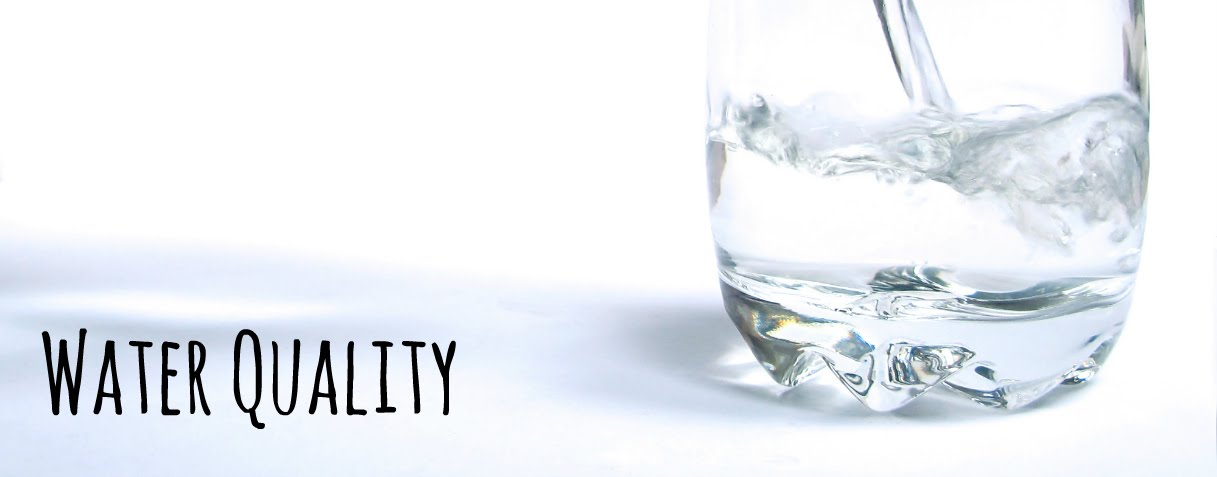

<h2 style="font-size:250%; font-family:cursive; color:#B8860B;"><b>Problem Statement:</b><h2>

<p style="font-size:100%; font-family:Verdana">Water is one of a most important part for surviving on Earth Also safe drinking-water is essential to health.Every region have a different type of water quality.It is necessary that drinking water is clean and safe. </p>
 
<p style="font-size:100%; font-family:Verdana"> So the objective of this project is to identify whether the water is safe for human consumption or not</p>
    
    
    
<h2 style="font-size:250%; font-family:cursive; color:#B8860B;"><b>About Dataset:</b><h2>
<ul>
    <li style="font-size:80%; font-family:Courier New"><b>pH Value:</b> indicator of acidic or alkaline condition of water.WHO has recommended maximum permissible limit of pH from 6.5 to 8.5</li>
    <li style="font-size:80%; font-family:Courier New"><b>Hardness:</b> the capacity of water to precipitate soap caused by Calcium and Magnesium.</li>  
    <li style="font-size:80%; font-family:Courier New"><b>Solids (Total dissolved solids - TDS):</b>Ability of water to dissolve awide range of organic,inorganic materials and salts.The water with high TDS value indicates that water is highly mineralized.for drinking,Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l</li>
    <li style="font-size:80%; font-family:Courier New"><b>Chloramines:</b>It is one of major disinfectants used in public water systems.Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.</li>
    <li style="font-size:80%; font-family:Courier New"><b>Sulfate:</b> It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.</li>
    <li style="font-size:80%; font-family:Courier New"><b>Conductivity:</b> Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.</li>
    <li style="font-size:80%; font-family:Courier New"><b>Organic_carbon:</b> According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.</li>
    <li style="font-size:80%; font-family:Courier New"><b>Trihalomethanes:</b>THMs are chemicals which may be found in water treated with chlorine.THM levels up to 80 ppm is considered safe in drinking water.</li>
    <li style="font-size:80%; font-family:Courier New"><b>Turbidity:</b> The turbidity of water depends on the quantity of solid matter present in the suspended state.WHO recommended value is 5.00 NTU.</li>
    <li style="font-size:80%; font-family:Courier New"><b>Potability:</b> Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.</li>
</ul>    

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>1. Import Libraries & Load Dataset</b></h3></center>

In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold,ShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
from sklearn.metrics import roc_curve, auc


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


%matplotlib inline
import random

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
data.head()

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>2. Descriptive Statistics of Data</b></h3></center>

In [ ]:
data.info()

In [ ]:
#shape:
data.shape


In [ ]:
data.describe()

<ul>
    <li style="font-size:180%; font-family:Verdana;">There is a huge variation in mean, and we can see there are some  missing values in ph,Sulfate and Trihalomethanes.</li>
</ul>

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>3. Handle the Columns with Missing values</b></h3></center>

In [ ]:
# visualize null values

plt.figure(figsize=(8,4))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [ ]:
# null value in Percentage
(data.isnull().sum()/len(data) *100).sort_values(ascending=False)

<ul>
    <li style="font-size:180%; font-family:Verdana;">As we can see sulfate have 23.84 % missing value,ph having 14.98% and Trihalomethanes having 4.94 % Missing values</li>
        <li style="font-size:180%; font-family:Verdana;">These all the important features and they have small fraction of missing values so will handle them</li>
</ul>

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>3.1 Handle Sulfate Column</b></h4>

In [ ]:
#fill Missing values in Sulfate
data['Sulfate_null'] =np.where(data['Sulfate'].isnull(),1,0)
data['Sulfate'].fillna(data['Sulfate'].mean(),inplace=True)


<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>3.2 Handle pH Column</b></h4>

In [ ]:
# Fill  missing value in ph
data['ph_null'] =np.where(data['ph'].isnull(),1,0)
data['ph'].fillna(data['ph'].mean(),inplace=True)

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>3.3 Handle Trihalomethanes Column</b></h4>

In [ ]:
# Fill  missing value in Trihalomethanes
data['Trihalomethanes_null'] =np.where(data['Trihalomethanes'].isnull(),1,0)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(),inplace=True)

In [ ]:
# Confirm missing value
data.isnull().sum()

<p style="font-size:180%; font-family:Verdana; text-align:center;"><b>"MISSING VALUES ARE HANDLED"</b></p>

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>4. Visualization of Target Variable</b></h3></center>

In [ ]:
# Target Variable 
ax =sns.countplot(data.Potability,palette="Set1")
ax.set_xticklabels(['Not potable','Potable'])
print('Not potable(0):',data.Potability.value_counts()[0])
print('Potable(1):',data.Potability.value_counts()[1])

In [ ]:
style.use('seaborn-deep')
labels=[0,1]
data['Potability'].value_counts().plot(kind='pie',labels=labels,subplots=True,autopct='%1.0f%%',labeldistance=1.1, figsize=(8,8))

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>5. Distribution of other features w.r.t Potability</b></h3></center>

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>5.1 Distribution of pH values</b></h4>

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['ph'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['ph'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of pH w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['ph'],fit=norm,color='darkorchid')
plt.title('Distribution of pH')

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>5.2 Distribution of Hardness values</b></h4>

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Hardness'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Hardness'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Hardness w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Hardness'],fit=norm,color='darkorchid')
plt.title('Distribution of Hardness')

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>5.3 Distribution of Solids values</b></h4>

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Solids'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Solids'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Solids w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Solids'],fit=norm,color='darkorchid')
plt.title('Distribution of Solids')

**As we can see there is little skewness in Solids if you want to remove this skewness just uncomment the next code lines**

In [ ]:
# here we perform square root transformation.It is one of a method to remove skewness in data

#data['Solids'] = np.sqrt(data['Solids'])

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>5.4 Distribution of Chloramines values</b></h4>

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Chloramines'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Chloramines'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Chloramines w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Chloramines'],fit=norm,color='darkorchid')
plt.title('Distribution of Chloramines')

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>5.5 Distribution of Sulfate values</b></h4>

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Sulfate'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Sulfate'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Sulfate w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Sulfate'],fit=norm,color='darkorchid')
plt.title('Distribution of Sulfate')

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>5.6 Distribution of Sulfate values</b></h4>

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Conductivity'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Conductivity'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Conductivity w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Conductivity'],fit=norm,color='darkorchid')
plt.title('Distribution of Conductivity')

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>5.7 Distribution of Organic_carbon values</b></h4>

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Organic_carbon'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Organic_carbon'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Organic_carbon w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Organic_carbon'],fit=norm,color='darkorchid')
plt.title('Distribution of Organic_carbon')

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>5.8 Distribution of Trihalomethanes values</b></h4>

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Trihalomethanes'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Trihalomethanes'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Trihalomethanes w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Trihalomethanes'],fit=norm,color='darkorchid')
plt.title('Distribution of Trihalomethanes')

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>5.9 Distribution of Turbidity values</b></h4>

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Turbidity'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Turbidity'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Turbidity w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Turbidity'],fit=norm,color='darkorchid')
plt.title('Distribution of Turbidity')

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>6. BoxPlot to check for Outliers"</b></h3></center>

In [ ]:

background_color = "lightskyblue"
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig=plt.figure(figsize=(30,30))
fig.patch.set_facecolor(background_color) 
feature = [x for x in data.columns if 'Potability' not in x and 'null' not in x]
for i in enumerate(feature):
    ax=plt.subplot(4,3,i[0]+1)
    ax.set_facecolor(background_color)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxenplot(y=i[1],data=data,palette=[random.choice(color_palette)])
    plt.title(i[1])
    plt.xticks(rotation=45)

    

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>7. Pair plot</b></h3></center>

In [ ]:
columns= [x for x in data.columns if 'null' not in x ]
sns.pairplot(data=data[columns],hue='Potability',palette="husl",markers=["o", "D"],corner=True,diag_kws=dict(fill=False))

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>8. Correlation Matrix</b></h3></center>

In [ ]:

plt.figure(dpi = 120,figsize= (8,3))
mask = np.triu(np.ones_like(data[columns].corr(),dtype = bool))
sns.heatmap(data[columns].corr(),mask = mask, fmt = ".1f",annot=True,lw=2,cmap = 'cividis',)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>9. Model Building</b></h3></center>

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>9.1 Split dataset into Train and test</b></h4>

In [ ]:
X = data.drop('Potability',axis=1).values
y = data.Potability.values

In [ ]:
# Split dataset into train,test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)


In [ ]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>9.2 Feature Scaling</b></h4>

In [ ]:
# Feature Scaling
#feat = [x for x in X.columns if 'null' not in x]
sc =StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>9.3 Random Forest Model</b></h4>

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

In [ ]:
Y_pred = rf.predict(x_test)
rf_val_score= accuracy_score(y_test,Y_pred)*100
rf_train_score= accuracy_score(y_train,rf.predict(x_train))*100

In [ ]:
rf_val_score

In [ ]:
print(classification_report(y_test,Y_pred))

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>9.4 SVM</b></h4>

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)

In [ ]:
Y_svc_pred = svc.predict(x_test)
accuracy_score(y_test,Y_svc_pred)
svc_val_score= accuracy_score(y_test,Y_svc_pred)*100
svc_train_score= accuracy_score(y_train,svc.predict(x_train))*100

In [ ]:
print(classification_report(y_test,Y_svc_pred))

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>9.5 Gaussian Naive Bayes</b></h4>

In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)

In [ ]:
Y_nb_pred = nb.predict(x_test)
nb_val_score= accuracy_score(y_test,Y_nb_pred)*100
nb_train_score= accuracy_score(y_train,nb.predict(x_train))*100

In [ ]:
print(classification_report(y_test,Y_nb_pred))

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>9.6 KNN </b></h4>

In [ ]:
# knn

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
Y_kn_pred = kn.predict(x_test)


kn_val_score= accuracy_score(y_test,Y_kn_pred)*100
kn_train_score= accuracy_score(y_train,kn.predict(x_train))*100

<h4 style="font-size:150%; font-family:cursive; color:#B8860B;"><b>9.7 Xgboost</b></h4>

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
Y_xgb_pred = xgb.predict(x_test)


xgb_val_score= accuracy_score(y_test,Y_xgb_pred)*100
xgb_train_score= accuracy_score(y_train,xgb.predict(x_train))*100

In [ ]:
model=["Random Forest","SVM","Gaussian Naive Bayes","KNN","Xgboost"]
val_score =[rf_val_score,svc_val_score,nb_val_score,kn_val_score,xgb_val_score]
train_score = [rf_train_score,svc_train_score,nb_train_score,kn_train_score,xgb_train_score]

df = pd.DataFrame()
df['models'] = model
df['train_set_score'] = train_score
df['validation_set_score'] = val_score

df.head()

In [ ]:
colors = ["lime", "purple", "orange", "magenta","blue","green"]

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=df['models'],y=df['validation_set_score'], palette=colors)
plt.show()

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>10. Feature Updates</b></h3></center>

<h4 style="font-size:120%; font-family:cursive; color:darkmagenta;"><b>10.1 We will use Hyperparameter Tuning for improving results </b></h4>
<h4 style="font-size:120%; font-family:cursive; color:darkmagenta;"><b>10.2 We will use other techniques also like custom ensembling,stacking etc. </b></h4>
<h4 style="font-size:120%; font-family:cursive; color:darkmagenta;"><b>10.3 Last but no least we will also try ANN </b></h4>

<center><h3 style="font-size:200%; font-family:cursive; color:#B8860B;"><b>11. Conclusion</b></h3></center>

<p style="font-size:180%; font-family:Verdana; text-align:center;"><b>"Thanks for visiting this notebook.Feel free to give me any suggestion about this Notebook."</b></p>

<p style="font-size:180%;color:sienna; font-family:Verdana; text-align:center;"><b>Please give an upvote, if you like & find this kernel helpful.</b></p>
<p style="font-size:180%;color:sienna; font-family:Verdana; text-align:center;"><b>Thank you!!!</b></p>